In [7]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) #y1 - ym 까지 포함한느 타겟 벡터

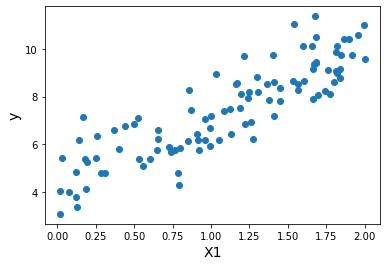

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.xlabel("X1", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.scatter(X, y)
plt.show()

In [21]:
#비용함수를 최소화하는 세타-모델 파라미터(편향 및 특성의 가중치) 찾기

#정규방정식
X_b = np.c_[np.ones((100, 1)), X] #모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(X_b)
theta_best

[[1.         0.53369487]
 [1.         1.82016219]
 [1.         1.80970822]
 [1.         1.25703551]
 [1.         0.28596445]
 [1.         1.29945895]
 [1.         0.8567329 ]
 [1.         0.78394894]
 [1.         1.8441661 ]
 [1.         1.8986494 ]
 [1.         0.02045729]
 [1.         1.1234282 ]
 [1.         1.86134131]
 [1.         0.65646002]
 [1.         1.74359874]
 [1.         1.41029229]
 [1.         1.56211829]
 [1.         0.18075912]
 [1.         1.66259181]
 [1.         1.83688283]
 [1.         1.27266545]
 [1.         1.53904126]
 [1.         1.95771959]
 [1.         0.25527978]
 [1.         1.23924343]
 [1.         0.7911684 ]
 [1.         1.40482852]
 [1.         0.49889827]
 [1.         0.96220831]
 [1.         1.77399334]
 [1.         0.36724508]
 [1.         1.60586428]
 [1.         1.3636261 ]
 [1.         0.26120675]
 [1.         0.91907778]
 [1.         1.02921641]
 [1.         0.80157858]
 [1.         0.16760766]
 [1.         1.99744205]
 [1.         1.91551258]


array([[4.28639162],
       [2.88034974]])

In [13]:
#세타를 이용해 예측 수행
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #모든 샘플에  X0=1을 추가
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[ 4.28639162],
       [10.04709109]])

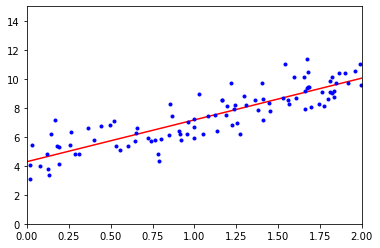

In [14]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#편향과 가중치
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)

[4.28639162] [[2.88034974]]


array([[ 4.28639162],
       [10.04709109]])

In [17]:
#LinearRegression은 최소 제곱을 기반으로 함
#SVD는 특잇값 분해
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.28639162],
       [2.88034974]])

경사하강법은 특성 수에 민감하지 않으므로 수십만 개의 특성에서 선형 회기를 훈련시키려면 정규방정식이나 SVD분해보다 경사하강법이 훨씬 빠르다

In [38]:
#경사하강법

#에타 - 학습률
eta = 0.1
n_iterations = 1000
m = 100 #샘플 수

#각 에포크별 학습 결과
theta_path_bgd = []

theta = np.random.randn(2, 1) #무작위 초기화
for iter in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) #그래디언드 : 비용 함수의 미분값
    theta = theta - eta * gradients
    
    theta_path_bgd.append(theta)

theta

array([[4.28639162],
       [2.88034974]])

배치 경사하강법은 매 스텝에서 전체 훈련 세트를 사용해 그래디언트를 계산하므로 훈련세트가 커지면 매우 느려진다

확률적 경사하강법(SGD)은 매 스텝에서 한 개의 샘플을 무작위로 선택하고 하나의 샘플에 대한 그래디언트를 계산. 다만 확율적이기 때문에 배치 경사 하강법보다 비교적 불안정.

그래서 학습률을 점진적으로 감소시킴. 매 반복에서 학습률을 결정하는 함수를 학습 스케쥴이라고 함

In [26]:
print(X_b[1])
X_b[1:2]

[1.         1.82016219]


array([[1.        , 1.82016219]])

In [30]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


그림 저장: sgd_plot


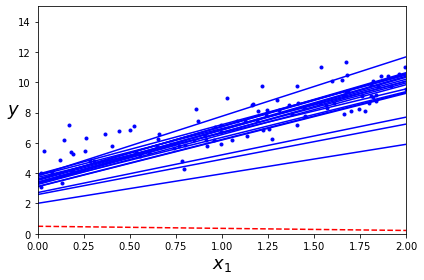

In [31]:
#간단한 학습 스케쥴을 사용한 확률적 경사하강법
n_epochs = 50 #전체 과정 50번 반복
t0, t1 = 5, 50 #학습 스케쥴 하이퍼 파라미터

#각 반복별 학습 결과
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #무작위 초기화

for epoch in range(n_epochs):
    for i in range(m): #샘플 개수 만큼 수행
        if epoch == 0 and i < 20: #첫번째 반복에 대해 초기 20번을 그래프로 표시
            y_predict = X_new_b.dot(theta) #X_new_b : 예측을 위한 새 입력 값
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
        theta_path_sgd.append(theta)
        
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("sgd_plot")
plt.show()

배치 경사하강법이 전체 훈련 세트에 대해 1000번 반복하는데, 확률적 경사하강법(SGD)은 50번만 반복하고도 유사한 값에 도달

In [33]:
print(theta)

#학습 과정
print(theta_path_sgd)



[[4.29091412]
 [2.95044583]]
[array([[2.01043849],
       [1.94783381]]), array([[2.58921776],
       [2.32599255]]), array([[2.71855267],
       [2.49059262]]), array([[3.11873259],
       [3.10265469]]), array([[3.10391143],
       [3.08453125]]), array([[3.24986852],
       [3.29558337]]), array([[3.31265927],
       [3.386378  ]]), array([[3.38409754],
       [3.50642399]]), array([[3.36079704],
       [3.48525099]]), array([[3.561454  ],
       [3.53647465]]), array([[3.41471006],
       [3.27091093]]), array([[3.83688232],
       [3.92065146]]), array([[3.5186733 ],
       [3.34157702]]), array([[3.59892547],
       [3.487649  ]]), array([[3.59123088],
       [3.47471888]]), array([[3.33642774],
       [3.02269982]]), array([[3.83785115],
       [3.10674222]]), array([[3.9294703 ],
       [3.27350393]]), array([[3.72151508],
       [2.92049192]]), array([[3.75898532],
       [2.98645635]]), array([[3.56787454],
       [2.74323626]]), array([[3.73755658],
       [2.97461912]]), ar

In [34]:
print(y)

print(y.ravel()) #= reshape(-1)

[[ 5.39070781]
 [10.10647415]
 [ 9.08097759]
 [ 6.93427023]
 [ 4.79675562]
 [ 8.8123232 ]
 [ 8.26490978]
 [ 4.80326313]
 [ 9.72702617]
 [10.41828452]
 [ 3.08704675]
 [ 7.47926423]
 [10.40334738]
 [ 6.58662617]
 [ 8.24894022]
 [ 8.62615166]
 [ 8.52042761]
 [ 5.36483823]
 [ 9.13990975]
 [ 9.15994613]
 [ 6.22196965]
 [11.02402776]
 [10.56020667]
 [ 5.43438725]
 [ 7.92878521]
 [ 4.30491653]
 [ 9.73513253]
 [ 6.8308088 ]
 [ 7.04215055]
 [ 8.09913867]
 [ 6.59826668]
 [ 8.64441532]
 [ 8.51336559]
 [ 6.33934187]
 [ 5.76644067]
 [ 8.93131218]
 [ 5.85568771]
 [ 7.15244989]
 [ 9.5742885 ]
 [ 9.74721383]
 [ 3.78049925]
 [ 9.71684152]
 [10.12717199]
 [ 5.91142308]
 [ 7.10112489]
 [ 7.17878761]
 [ 4.00700814]
 [ 5.27773503]
 [ 6.15615391]
 [ 8.17158012]
 [ 6.69607873]
 [ 6.17921575]
 [ 8.99875903]
 [ 5.80851158]
 [10.99436593]
 [ 7.43471312]
 [ 7.20414533]
 [ 6.1865454 ]
 [ 8.51827851]
 [ 9.12143531]
 [ 6.23487477]
 [11.36063598]
 [ 4.03313705]
 [ 8.07227394]
 [ 4.84060155]
 [ 8.76424359]
 [ 5.10578

In [36]:
#에포크 마다 훈련 세트를 섞고, 차례대로 하나씩 선택해서 수행, 다음 에포크에서 다시 랜덤하게 섞어서 수행
from sklearn.linear_model import SGDRegressor

#에포크 1000, 한 에포크에서 손실이 0.001보다 작게 줄어들 때까지, 학습률 0.1, 규제 없음
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) #ravel() == reshape(-1)

SGDRegressor(eta0=0.1, penalty=None)

In [37]:
#편향, 가중치
sgd_reg.intercept_, sgd_reg.coef_

(array([4.28959299]), array([2.89421526]))

미니배치 경사 하강법 - 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그래디언트를 계산

주요 장점은 행렬 연산에 최적화된 GPU를 사용해서 얻는 성능 향상

In [39]:
#미니배치 경사 하강법
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) #랜덤 초기화

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    #permutations은 shuffle과 달리 원본을 건들지 않고 리턴한다.
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i: i+minibatch_size]
        yi = y_shuffled[i: i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[4.33150249],
       [2.93007607]])

In [40]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


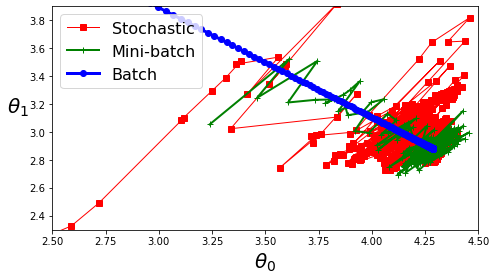

In [41]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

배치 경사하강법은 실제 최소값에서 멈추었지만, 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 맴돌고 있음

하지만 배치 경사하강법은 많은 시간이 소요되고, 확률적 경사하강법과 미니배치 경가 하강볍도 적절한 학습 스케쥴을 사용하면 최소값에 도달한다

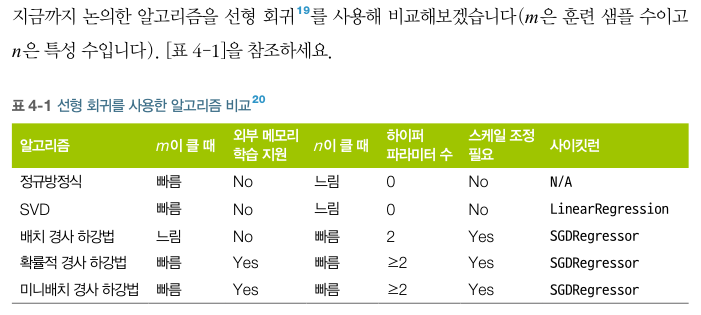

이 알고리즘들은 훈련 결과에 거의 차이가 없음

# 다항 회귀

In [42]:
np.random.randn(5, 1)

array([[ 0.19929731],
       [ 0.28672984],
       [-0.48884984],
       [-0.27843288],
       [ 0.53322556]])

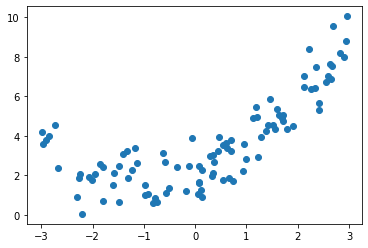

In [43]:
#2차방정식으로 비선형 데이터 생성(약간의 잡음 포함)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)

In [46]:
#훈련세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가(여기서는 특성 하나가 추가됨)
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])

#원래의 특성X와 이 특성의 제곱을 포함
X_poly[0]

[0.70331284]


array([0.70331284, 0.49464894])

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
#편향, 가중치
lin_reg.intercept_, lin_reg.coef_

(array([2.13047302]), array([[0.91305788, 0.45790114]]))

그림 저장: quadratic_predictions_plot


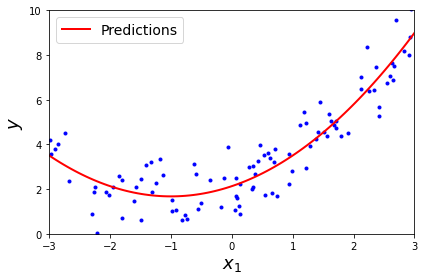

In [53]:
#-3과 3 사이를 100개로 쪼개기
X_new = np.linspace(-3, 3, 100).reshape(100, 1) #100행 1열로 변환
#위에서 주어진 파라미터로 poly_features.fit_transform했기 때문에 다음부터는 그냥 transform만 수행
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

고차 다항 회기는 보통의 선형 회기보다 훈련 데이터에 잘 맞추려 한다

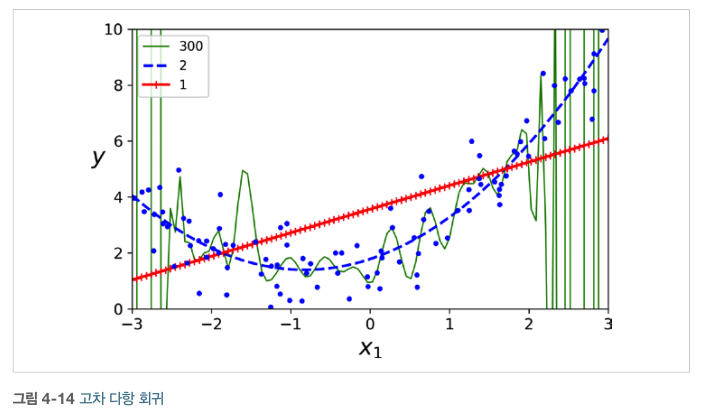

300차 다항 회귀 모델은 훈련 샘플에 최대한 가까이 가려고 함. 훈련 데이터에 과대적합

In [60]:
#학습 곡선 살펴보기
#MSE - 평균제곱오차
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train set")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test set")
    plt.xlabel("testset counts", fontsize=18)
    plt.ylabel("RSME", fontsize=18)
    plt.legend()

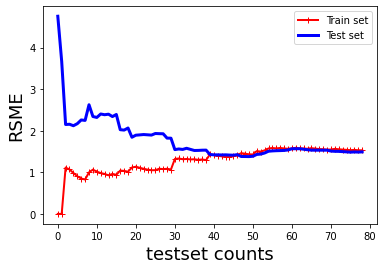

In [61]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

#과소 적합이 일어남

#과소 적합과 과대 적합(https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-2-%EC%9D%BC%EB%B0%98%ED%99%94-%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9-%EA%B3%BC%EC%86%8C%EC%A0%81%ED%95%A9/)

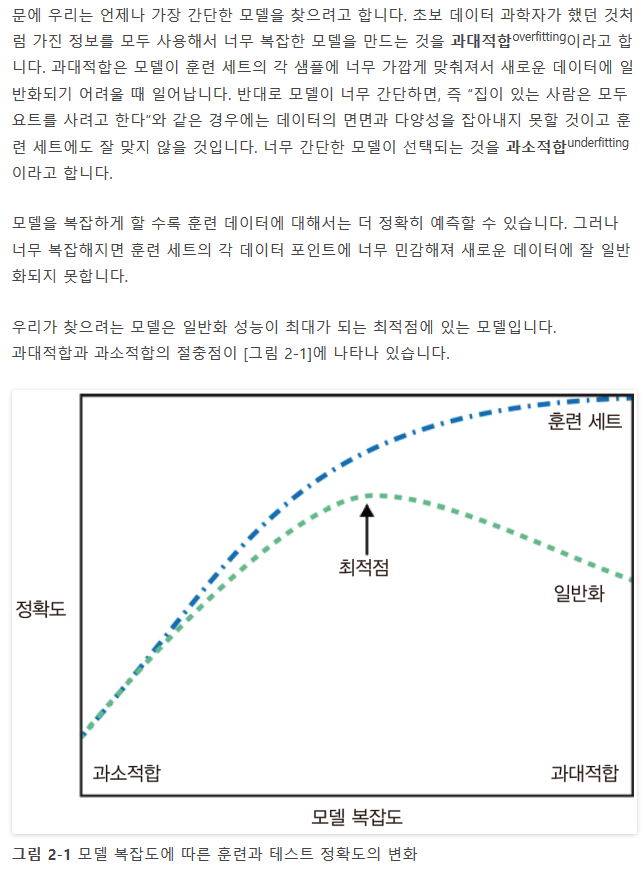

모델이 훈련 데이터에 과소 적합 되어 있다면, 훈련 샘플을 더 추가해도 효과가 없음. 더 복잡한 모델을 사용하거나 더 나은 특성을 사용해야 함

그림 저장: learning_curves_plot


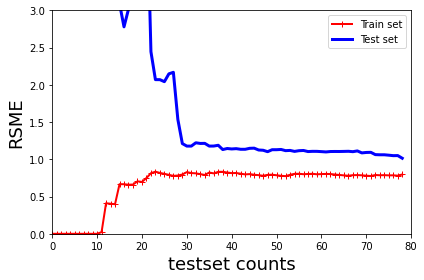

In [65]:
#10차 다항회기 학습 곡선
from sklearn. pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 오차가 너무 크게 나타나므로 표시 범위를 줄여야
save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

훈련 데이터의 모델 성능이 검증 데이터 보다 우수한데, 과대적합의 특징, 더 큰 훈련 모델을 사용하면 두 곡선이 점점 가까워 짐.

과대적합을 감소시키는 방법은 모델을 규제하는 것(모델을 제한)

선형 회귀모델에서는 보통 모델의 가중치를 제한함으로써 규제

# 규제가 있는 모델

In [70]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

그림 저장: ridge_regression_plot


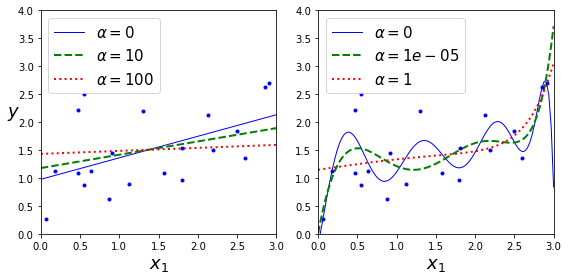

In [71]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

In [72]:
#정규 장벙식으로 사용한 릿지 회귀
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [73]:
#확률적 경사하강법에 릿지 규제 적용
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

c:\sources\python\deeplearning\dl\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


그림 저장: lasso_regression_plot


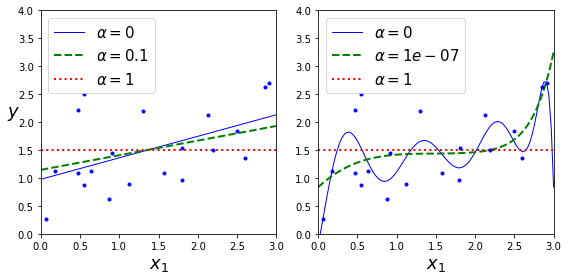

In [74]:
#라쏘 회귀
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [76]:
#엘라스틱 넷은 릿지 회귀와 라쏘 회귀를 절충한 모델
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

평범한 선형회귀는 피해야 한다.

릿지가 기본이고, 쓰이는 특성이 몇 개 뿐이라고 판단되면 라쏘나 엘라스틱넷이 낫다.(불필요한 특성의 가중치를 0으로 만듬)

특성 수가 훈련 샘플보다 많거나, 특성 몇개가 강하게 연관되어 있을 때는 엘라스틱넷이 낫다

In [78]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [80]:
#조기 종료 예제

from sklearn.base import clone

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_test_poly_scaled = poly_scaler.transform(X_test)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_test_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #중지된 곳에서 다시 시작
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    test_error = mean_squared_error(y_test, y_test_predict)
    if test_error < minimum_test_error:
        minimum_test_error = test_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        # sklearn.base.clone으로 복사된 모델은 다시 훈련해야 하므로 
        # 이미 훈련된 모델을 저장해두고 싶으면 밑의 코드 처럼
        # best_model = sgd_reg; sgd_reg = clone(sgd_reg)

그림 저장: early_stopping_plot


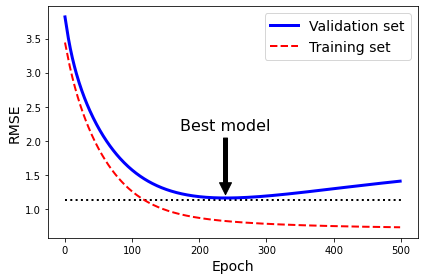

In [83]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, #warm_start는 처음부터 다시 시작하지 않고, 이전 모델 파라미터에서 훈련을 이어감
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, test_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_test_predict = sgd_reg.predict(X_test_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

best_epoch = np.argmin(test_errors) #에러가 최소인 값의 인덱스
best_test_rmse = np.sqrt(test_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_test_rmse),
             xytext=(best_epoch, best_test_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_test_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_test_rmse, best_test_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [84]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

# 로지스틱 회귀

특정 클래스에 속할 확률을 추정

In [1]:
#붗꼿 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [6]:
import numpy as np

print(iris["feature_names"])
X = iris["data"][:, 3:] #꽃잎의 너비
y = (iris["target"] == 2).astype(np.int) #Iris-Virginica면 1, 아니면 0

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


Text(0, 0.5, 'probability')

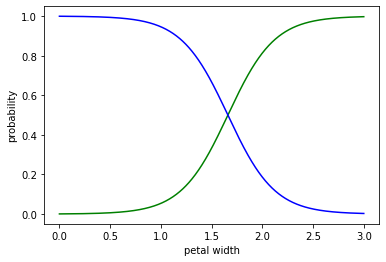

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

#0 부터 3사이를 1000개로 나누어
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #열1에 맞춰서 행을 자동으로
y_proba = log_reg.predict_proba(X_new)
print(y_proba)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b-", label="Not Iris virginica")
plt.xlabel("petal width") #꽃잎 너비(cm)
plt.ylabel("probability") #확률

꽃잎 너비가 2cm이상인 꽃은 Iris-Virginica라고 강하게 확신

양쪽의 확률은 대략 1.6cm에서 50%가 됨.

In [13]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

numpy meshgrid (https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy)

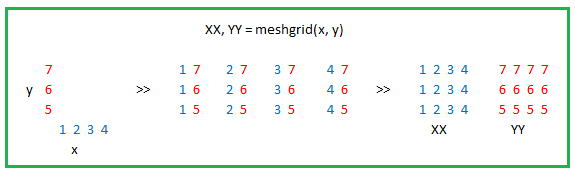

In [17]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)] #petal length, petal width 꽃잎 길이, 너비
y = (iris["target"] == 2).astype(np.int) #Iris-Virginica면 1, 아니면 0

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( #reshape가 없어도 어파치 1차원이고, 결과도 같은데 왜 굳이 변환을...?
    np.linspace(2.9, 7, 500).reshape(-1, 1),  #꽃잎 길이(x축)
    np.linspace(0.8, 2.7, 200).reshape(-1, 1) #꽃잎 너비(y축)
) #x좌표 500개 * y좌표 200개 조합
  # -> x좌표 500개를 1행으로 해서 200행을 복사 -> 200X500 행렬
  # -> y좌표 200개를 1열로 해서 500열을 복사 -> 200X500 행렬
X_new = np.c_[x0.ravel(), x1.ravel()] #-> 값 두 개를 이어 붙여서 100000X2 행렬로 -> 각 행은 (꽃잎 길이, 꽃잎 너비)

y_proba = log_reg.predict_proba(X_new)



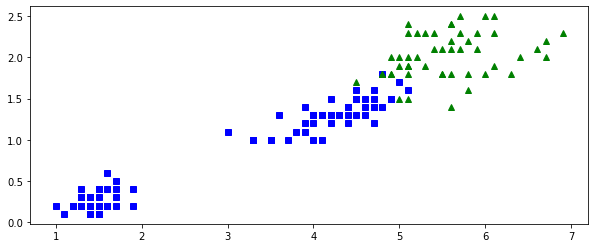

In [18]:
plt.figure(figsize=(10, 4))
#x축이 꽃잎 길이, y축이 꽃잎 넓이로 각 데이터 표시
plt.plot(X[y==0, 0], X[y==0, 1], "bs") #y==0, Iris-Virginica가 아닌 것들 중에서 꽃잎 길이와 꽃잎 너비
plt.plot(X[y==1, 0], X[y==1, 1], "g^") #y==0, Iris-Virginica인 것들 중에서 꽃잎 길이와 꽃잎 너비

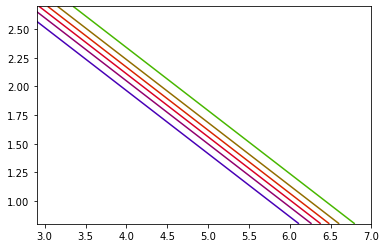

In [34]:
zz = y_proba[:, 1].reshape(x0.shape) #Iris-Virginica 인것들의 확률을 200X500행렬로 변환
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

Contour는 3차원 값을 2차원에 표시하기 위한 방법

예측 값 X, Y에 대한 정답 Z의 변화를 나타낸다. Z = f(X, Y)

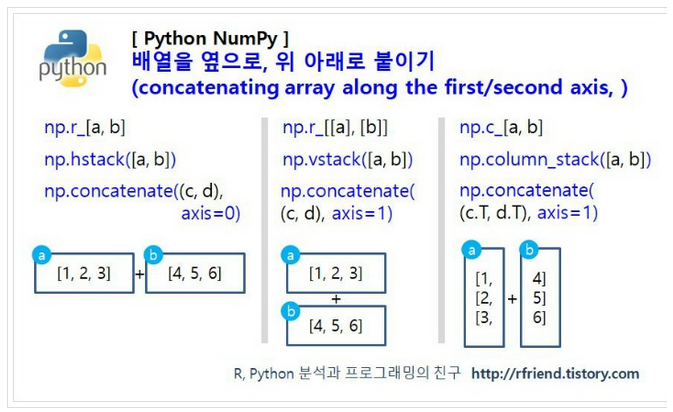

In [36]:
import os

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

그림 저장: logistic_regression_contour_plot


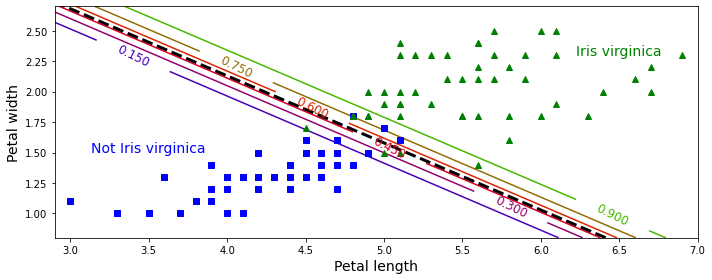

In [37]:
# 위 코드들 합쳐서

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)] #petal length, petal width 꽃잎 길이, 너비
y = (iris["target"] == 2).astype(np.int) #Iris-Virginica면 1, 아니면 0

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( #reshape가 없어도 어파치 1차원이고, 결과도 같은데 왜 굳이 변환을...?
    np.linspace(2.9, 7, 500).reshape(-1, 1),  #꽃잎 길이(x축)
    np.linspace(0.8, 2.7, 200).reshape(-1, 1) #꽃잎 너비(y축)
) #x좌표 500개 * y좌표 200개 조합
  # -> x좌표 500개를 1행으로 해서 200행을 복사 -> 200X500 행렬
  # -> y좌표 200개를 1열로 해서 500열을 복사 -> 200X500 행렬
X_new = np.c_[x0.ravel(), x1.ravel()] #-> 값 두 개를 이어 붙여서 100000X2 행렬로 -> 각 행은 (꽃잎 길이, 꽃잎 너비)

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
#x축이 꽃잎 길이, y축이 꽃잎 넓이로 각 데이터 표시
plt.plot(X[y==0, 0], X[y==0, 1], "bs") #y==0, Iris-Virginica가 아닌 것들 중에서 꽃잎 길이와 꽃잎 너비
plt.plot(X[y==1, 0], X[y==1, 1], "g^") #y==0, Iris-Virginica인 것들 중에서 꽃잎 길이와 꽃잎 너비

zz = y_proba[:, 1].reshape(x0.shape) #Iris-Virginica 인것들의 확률을 200X500행렬로 변환
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

점선은 모델이 50% 확률을 추정하는 것이고, 맨 오른쪽 위의 직선을 넘어서 있는 꽃들은 90% 이상의 확률로 Iris-Virginica라고 판단

# 소프트맥스 회귀

In [38]:
X = iris["data"][:, (2, 3)] #꽃잎 길이, 꽃잎 너비
y = iris["target"]

#하이퍼파라미터 C를 사용하여 조절하는 l2규제 적용
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

그림 저장: softmax_regression_contour_plot


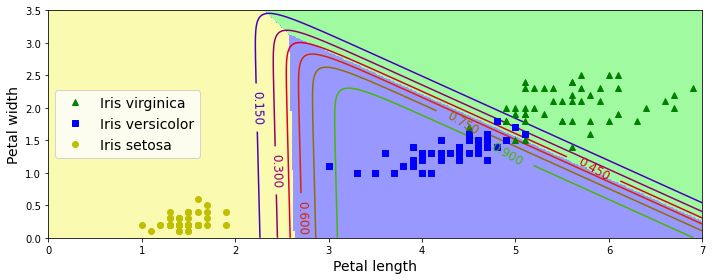

In [39]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)#정답이 Iris-versicolor인 것들
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

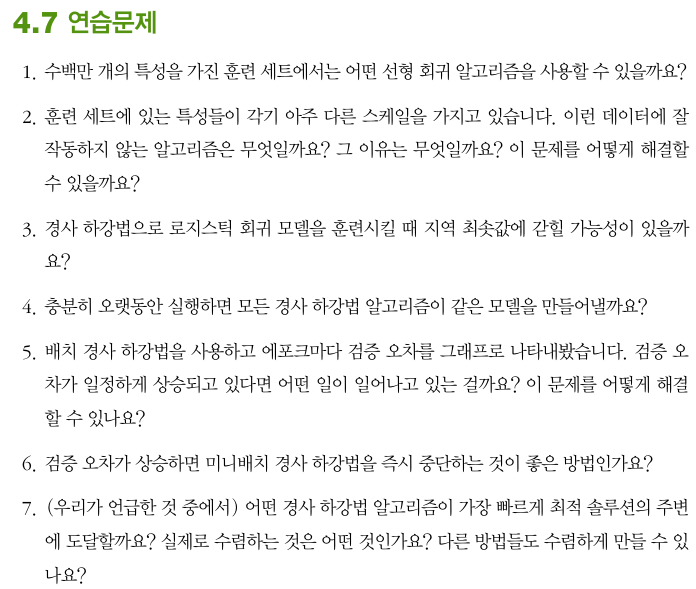
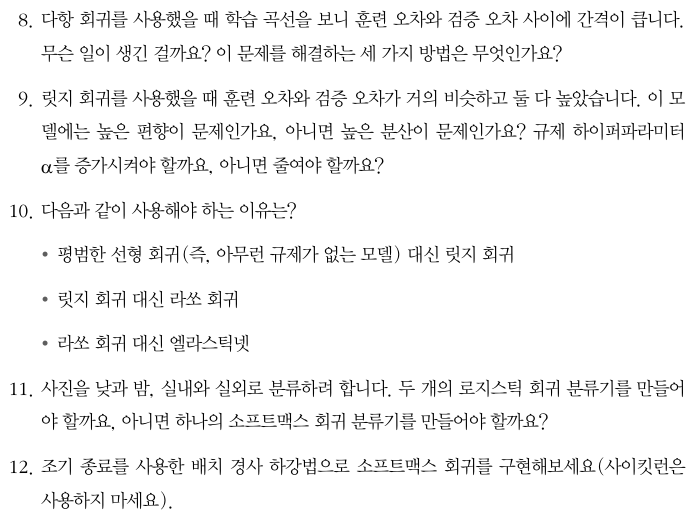

1. 수백만 개의 특성이라면, 확률적 경사하강법(SGD)이나 미니배치 경사 하강법.  
   훈련 세트가 메모리 크기에 맞으면 배치 경사 하강법도 가능.  
   정규방정식이나 SVD는 계산 복잡도 증가로 사용불가


2. 훈련 세트에 있는 특성의 스케일이 다르면 비용함수가 길쭉한 타워 모양의 그릇 형태. 경사하강법이 수렴하는데 매우 오래 걸림  
   특성의 스케일을 조절해야 함.  
   규제가 있는 모델은 특성의 스케일이 다르면 지역 최적점에 수렴할 가능성 있음(작은 특성 값이 큰 특성값에 비해 무시되는 경향 있음)


3. 비용 함수가 볼록이므로 지역 최소값에 갇힐 가능성 없음


4. 학습률을 점진적으로 감소시키지 않으면 확률적 경사하강법(SGD)과 미니배치 경사하강법은 최적점 주변을 계속 맴돌게 되므로 다른 모델 탄생


5. 학습률이 너무 높아서 알고리즘 발산. 훈련 에러도 같이 상승한다면 학습률 낮추어야 함.  
   하지만 훈련 에러가 올라가지 않는다면 과대 적합 가능성.


6. 무작위성 때문에 매번 학습이 진전되지 않을 수 있음.  
   더 나은 방법은 정기적으로 모델을 저장하고 오랫동안 최상의 점수를 넘지 못하면 저장된 것 중 가장 좋은 모델로 복원


7. 확률적 경사하강법은 한 번에 하나의 훈련 샘플만 사용하므로 가장 빠름, 다음이 미니배치. 단, 학습률을 점진적으로 감소시켜야 함.


8. 검증 오차가 훈련 오차보다 훨씬 높으면 과대적합.  
   다항 차수를 낮춰 자유도를 줄이거나  
   모델을 릿지나 라쏘로 규제함  
   훈련 세트의 크기를 증가시킴  


9. 훈련 에러와 검증 에러가 비슷하면서 높은 값이라면 과소 적합 가능성.  
   높은 평향을 가진 모델이므로 규제 하이퍼파라미터 a 감소 필요  


10. 일반적으로 규제가 있는 모델이 성능이 좋음  
    라쏘는 중요한 가중치를 제외하고 0으로 만드므로 자동으로 특성을 선택하는 효과가 있음. 몇 개의 특성만 유효할 것이라고 판단될 때 사용  
    몇 개의 특성이 강하게 연관되어 있거나, 훈련 샘플보다 특성이 더 많을 경우  
    
    
11. 실외와 실내, 낯과 밤은 배타적인 클래스가 아니므로(4가지 조합이 가능하므로) 두 개의 로지스틱 회귀  
    반대로 4개 중에 1개라면 소프트맥스 회귀

In [40]:
#12. 조기 종료를 사용한 배치 경사하강법으로 소프트맥스 구현
X = iris["data"][:, (2, 3)] #꽃잎 길이, 꽃잎 너비
y = iris["target"]

In [41]:
#모든 샘플에 편향을 추가(x0 = 1)
X_with_bias = np.c_[np.ones([len(X), 1]), X] #맨 왼쪽 열에 1 추가

X_with_bias

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.7, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.1],
       [1. , 1.5, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.1, 0.1],
       [1. , 1.2, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.3, 0.4],
       [1. , 1.4, 0.3],
       [1. , 1.7, 0.3],
       [1. , 1.5, 0.3],
       [1. , 1.7, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1. , 0.2],
       [1. , 1.7, 0.5],
       [1. , 1.9, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.4],
       [1. , 1.5, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.6, 0.2],
       [1. , 1.5, 0.4],
       [1. , 1.5, 0.1],
       [1. , 1.4, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.2, 0.2],
       [1. , 1.3, 0.2],
       [1. , 1.4, 0.1],
       [1. , 1.3, 0.2],
       [1. , 1.5, 0.2],
       [1. , 1.3, 0.3],
       [1. , 1.3

In [69]:
np.random.seed(2042)

In [70]:
#데이터 셋을 훈련 세트, 검증 세트, 테스트 세트로 분리
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [71]:
#타겟 클래스의 확률을 원핫 인코딩으로
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1 #각 행에 대해서 y에 있는 정답(0, 1, 2) 열에 대해서 1표시
    return Y_one_hot

In [72]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [73]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [74]:
y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

In [75]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [76]:
n_inputs = X_train.shape[1] #편향, 꽃잎 길이, 꽃잎 너비
n_outputs = len(np.unique(y_train)) # 3개의 붓꽃 클래스

In [77]:
#비용함수와 그래디언트 코딩
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs) #임의의 3x3 행렬

for iter in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1)) #교차 엔트로피
    error = y_proba - y_train_one_hot
    if iter % 500 == 0:
        print(iter, loss)
        
    gradients = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918712
5000 0.3956780375390374


In [78]:
#모델 파라미터
theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [79]:
logits = X_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1) #각 행에서 최대값(1)인 열의 인덱스

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

In [80]:
#비용 함수에 l2 규제 추가 및 그래디언트에서 추가 학습률도 증가

eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 #규제 하이퍼파라미터

theta = np.random.randn(n_inputs, n_outputs) #임의의 3x3 행렬

for iter in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    xentrypy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1)) #교차 엔트로피
    l2_loss = 1/2 * np.sum(np.square(theta[1:])) #맨 앞의 값은 편향이므로 규제하지 않음
    loss = xentrypy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    if iter % 500 == 0:
        print(iter, loss)
        
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.4946891059460321
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.489035124439786
4000 0.4889173621830817
4500 0.4888643337449302
5000 0.4888403120738818


In [81]:
logits = X_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1) #각 행에서 최대값(1)인 열의 인덱스

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [82]:
#조기 종료 추가

eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

    logits = X_valid.dot(theta)
    y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 조기 종료!


In [83]:
logits = X_valid.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1) #각 행에서 최대값(1)인 열의 인덱스

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

In [85]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    ) #200X500 X좌표, Y좌표 조합
X_new = np.c_[x0.ravel(), x1.ravel()] #(100000, 2)로 변환 입력은 각각 꽃잎 길이, 꽃잎 너비
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new] #맨 앞에 편향 추가

logits = X_new_with_bias.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1) #예측 결과

zz1 = y_proba[:, 1].reshape(x0.shape) #Iris-versicolor인 것만
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

NameError: name 'Y_proba' is not defined